In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from scipy.constants import c as speed_of_light

In [2]:
catalog = fits.open("../../BAM/nsa_v1_0_1.fits")[1].data
h = 0.688

In [13]:
absolute_magnitude = catalog['SERSIC_ABSMAG'][:, 4] - 5*np.log10(h)
K_correction  = catalog['SERSIC_KCORRECT'][:, 4]
comoving_distance = catalog['ZDIST']*speed_of_light*1e-3/(h*100)
redshift = catalog['ZDIST']

In [16]:
def absmag2appmag(M, comoving_distance, redshift, Kcorr):
    luminosity_distance = (1+redshift)*comoving_distance
    return M+25+5*np.log10(luminosity_distance)+Kcorr
    

In [18]:
apparent_magnitude = absmag2appmag(absolute_magnitude, comoving_distance, redshift, K_correction)

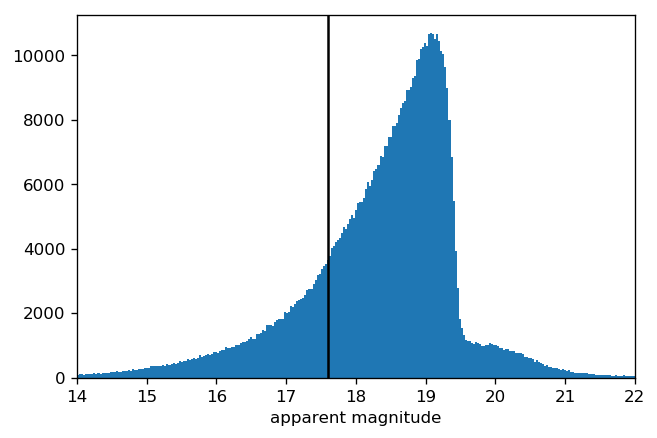

In [24]:
IDS = np.where(np.isfinite(apparent_magnitude))

plt.figure(dpi=120)
plt.hist(apparent_magnitude[IDS], bins='auto')
plt.xlim(14, 22)
plt.axvline(17.6, c='black')
plt.xlabel("apparent magnitude")
plt.show()